# 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# 2

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 3

In [11]:
corr = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
corr

# Самые скоррелированные переменные: average_montly_hours & number_project
# Наименее скоррелированные переменные: average_montly_hours & satisfaction_level

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

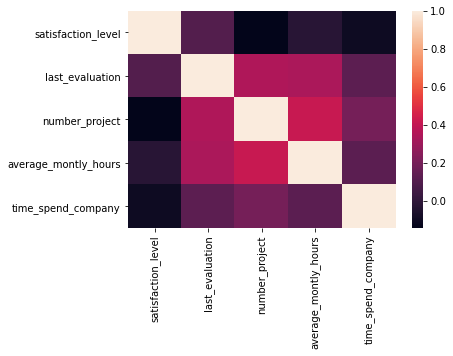

In [13]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 4

In [31]:
data.groupby('department').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


# 5

<AxesSubplot:xlabel='salary', ylabel='left'>

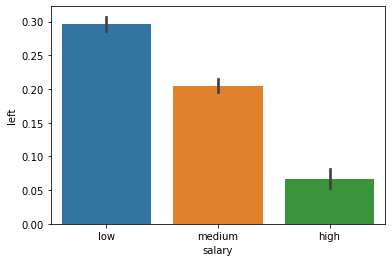

In [35]:
sns.barplot ( x = 'salary', y = 'left', data = data)

# 6

<AxesSubplot:xlabel='department'>

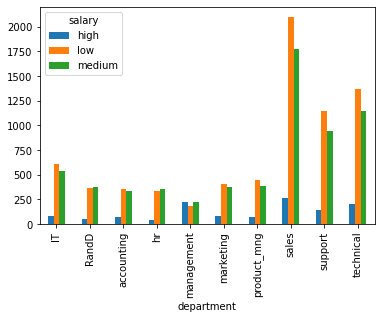

In [13]:
a = data.groupby(['department', 'salary'])['satisfaction_level'].count()
a.unstack().plot(kind = 'bar', stacked = False)


In [14]:
print(a)

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64


# 7

In [10]:
t1 = data.loc[data['salary'] == 'low']
t2 = data.loc[data['salary'] == 'high']

r1 = t1['average_montly_hours'].sum()
r2 = t2['average_montly_hours'].sum()
r2

247236

In [6]:

alpha = 0.05

result = st.ttest_ind(r1, r2, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


# 8

In [16]:
left = data.loc[data['left'] == 1]
present = data.loc[data['left'] == 0]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
left.loc[left['promotion_last_5years'] == 1].value_counts()

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years  department  salary
0.79                0.59             4               139                   3                   0              1     1                      management  low       3
0.45                0.51             2               160                   3                   1              1     1                      sales       low       3
0.41                0.56             2               154                   3                   0              1     1                      support     medium    3
                    0.46             2               160                   3                   0              1     1                      sales       low       3
0.11                0.79             6               292                   4                   0              1     1                      technical   low       3
0.46                0.45   

In [28]:
i = present.loc[present['promotion_last_5years'] == 1].count()
x = present['promotion_last_5years'].count()
b = i/x*100
b.head(1)

satisfaction_level    2.625131
dtype: float64

In [77]:
left['satisfaction_level'].mean()

0.44009801176140917

In [78]:
present['satisfaction_level'].mean()

0.666809590479516

In [79]:
left['number_project'].mean()

3.8555026603192384

In [80]:
present['number_project'].mean()

3.786664333216661

# 9

In [100]:
X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
                 'Work_accident', 'promotion_last_5years']]
y = data[['left']].values.ravel()

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [104]:
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,1,1
2,0,0
3,1,1
4,1,0
...,...,...
3745,0,0
3746,0,0
3747,0,0
3748,0,0


In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7594666666666666